In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load dataset
data = pd.read_csv("dataset.csv")

In [5]:
# Display basic information about the dataset
print("Dataset information:")
print(data.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB
None


In [6]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [7]:
# Check for null values
print("Null values check:")
print(data.isnull().sum())

Null values check:
Text        0
language    0
dtype: int64


In [8]:
# Check languages present in dataset
print(" present Languages in dataset:")
print(data["language"].value_counts())

 present Languages in dataset:
language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64


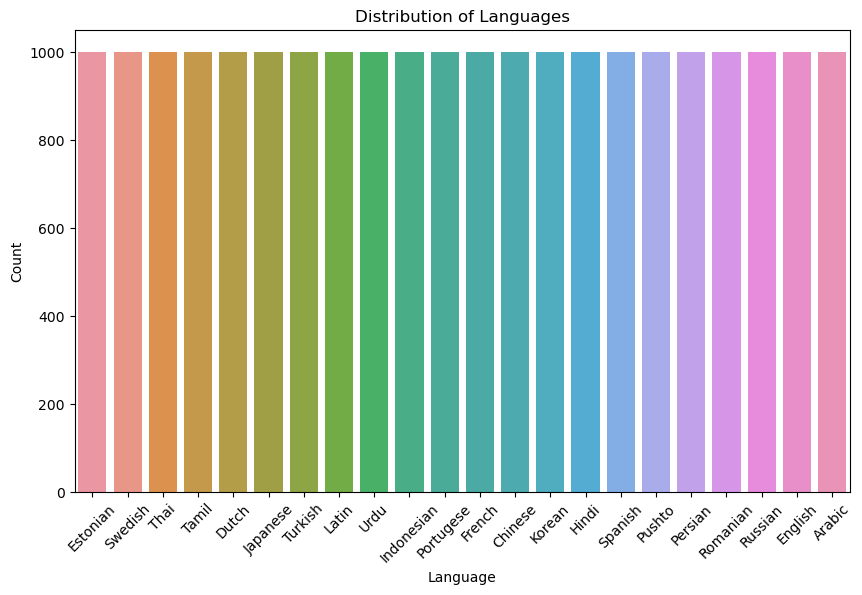

In [9]:
# Visualize distribution of languages
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="language")
plt.title("Distribution of Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
unique_languages = data["language"].nunique()
print("Number of unique languages:")
print(unique_languages)

Number of unique languages:
22


In [11]:
# Split data into features and labels
x = np.array(data["Text"])
y = np.array(data["language"])

In [12]:
# Convert text data into numerical format
cv = CountVectorizer()
X = cv.fit_transform(x)

In [13]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Train Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Generate classification report
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       341
     Chinese       0.93      0.50      0.65       317
       Dutch       0.99      0.99      0.99       346
     English       0.70      1.00      0.82       333
    Estonian       0.99      0.96      0.97       338
      French       0.95      0.99      0.97       324
       Hindi       1.00      0.98      0.99       341
  Indonesian       0.99      0.97      0.98       318
    Japanese       0.69      0.87      0.77       328
      Korean       1.00      0.98      0.99       325
       Latin       0.99      0.91      0.95       346
     Persian       1.00      1.00      1.00       323
   Portugese       1.00      0.96      0.98       318
      Pushto       1.00      0.97      0.98       328
    Romanian       0.99      0.98      0.99       324
     Russian       0.99      0.99      0.99       332
     Spanish       0.97      0.99      0.98       322
    

In [16]:
# Evaluate model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.953168044077135


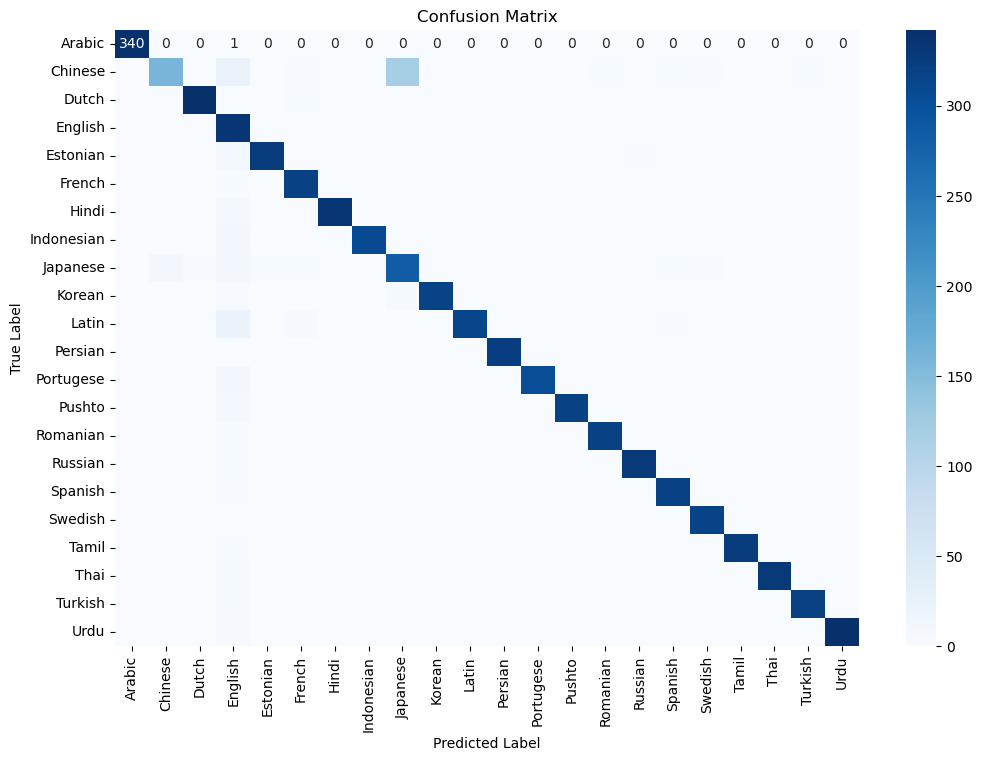

In [17]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Language detection from user input
user_input = input("Enter a Text: ")
user_data = cv.transform([user_input]).toarray()
output = model.predict(user_data)
print("Predicted Language:", output)